<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayes I Lab

_Authors: Matt Brems, Ben Shaver (DC)_

---


# Lab Part I

Watch [this video](https://www.youtube.com/watch?v=5NMxiOGL39M&t=13m2s) from 13:02 to 23:10.

**Question 1-a:** In the dog weighing example, how would you summarize the prior?

In [ ]:
What he thought the dog weighed before he weighed it

**Question 1-b:** In the dog weighing example, how would you summarize the likelihood?

In [ ]:
Probability of the new measurement being true

**Question 1-c:** In the dog weighing example, how would you summarize the posterior?

In [ ]:
Updated belief, or the likelihood times the prior

# Lab Part II

##### Suppose you find a coin on the ground. Denote the probability of flipping heads with $p$.

**Question 2-a:** Recall that a **distribution** is the set of all possible values of a variable and how frequently we observe each of the values. 

We want to construct a **prior distribution** for $p$. This prior distribution should summarize our beliefs about $p$ before seeing any data. If we know that $p$ must be between 0 and 1, then we should construct a prior distribution that reflects this knowledge. 

You and I have pretty strong beliefs that $p$, the probability of flipping heads, should be 0.5. It's possible that $p$ might be a bit less than 0.5 or a bit more than 0.5.

A very convenient distribution for this type of problem is called the **Beta distribution**. The [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is continuously defined between 0 and 1. Because of this quality (and for other reasons), we often use the Beta distribution when trying to describe our beliefs about probabilities.

Run the cells below. Here, we're plotting a Beta distribution with parameters $\alpha = 100$ and $\beta = 100$. (The Beta distribution is parameterized by $\alpha$ and $\beta$, much like the Normal distribution is parameterized by $\mu$ and $\sigma$.) In code, however, we often use `a` and `b` because alpha is such a common argument in functions.

In [147]:
# Import the necessary packages:

import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

In [91]:
# Define our alpha and beta parameters:

a = 100
b = 100

In [44]:
# This is the 0th percentile of our beta distribution:
lower = beta.ppf(0, a, b)

# This is the 100th percentile of our beta distribution:
upper = beta.ppf(1, a, b)

# Generate 100 x values in the appropriate
# range to use for plotting:
x = np.linspace(lower, upper, 101)


# The benefit of doing this is that we dont have 
# to know the upper and lower limits of the 
# distribution we're plotting. Although in many
# cases, we will. The Beta distribution is always
# defined between 0 and 1.

# (If you were plotting a normal distribution,
# you may only want to plot x values between the
# 1st and 99th percentiles)

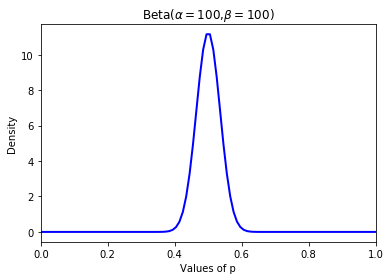

In [13]:
# Plot the x values, plus the corresponding probability
# at each value, using the .pdf method of a
# scipy.stats distribution:

plt.plot(x, beta(100,100).pdf(x),
        'b-', lw=2, alpha=1)

# Plot customization:
plt.ylabel('Density')
plt.xlim((0,1))
plt.xlabel('Values of p')
plt.title(r'Beta($\alpha=100$,$\beta=100$)');

This is our prior distribution. How would you summarize the prior distribution?

In [16]:
np.std(x)

0.29157646512850627

In [ ]:
Centered at 0.5, stdev of 0.29; note that 0.5 is the expected likelihood of flipping a head or tail

**Question 2-b:** We have our prior beliefs about $p$, the probability of flipping heads. Suppose that you flip the coin 10 times and get 8 heads. Is this in line with our prior expectations, or does this challenge these expectations? Why?

In [ ]:
It challenges it because we expect about a 50/50 split

**Question 2-c:** Let's specify our **likelihood function**. Recall that our likelihood is how we integrate data with our beliefs. Thinking back to our distributions lessons in week 2, why might a **Binomial distribution** be appropriate for this situation?

In [ ]:
Binomial distribution models two outputs (obverse/reverse)

**Question 2-d:** Plot the likelihood function for the observed data, using the code above as a guide. The parameters $n$ and $p$ of the binomial distribution can be inferred from the data.

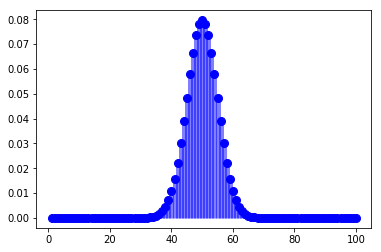

In [84]:
fig, ax = plt.subplots(1, 1)
n, p = 100, 0.5

x = np.linspace(1, 100, 100)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

**Question 2-e:** How would you describe, in English, our posterior distribution for this situation?

Posterior is a beta prior times a binomial likelihood which yields a beta posterior

**Question 2-f:** Our posterior distribution takes on the form:

$$ f(p|\text{data}) \propto f(\text{data}|p)f(p) $$

where $f(p)$ is our prior distribution and $f(\text{data}|p)$ is our likelihood. If we want to get a histogram of the posterior distribution, we should take the following steps:

1) Simulate one observation from $f(p)$. We'll call this $p'$.

2) Given the simulated value $p'$, simulate one observation from $f(\text{data}|p')$. We'll call this $l'$, for likelihood.

3) Multiply $l'$ by $p'$. This represents one observation from our posterior distribution $f(p|\text{data})$.

4) Repeat steps 1-3 10,000 times. Then plot our simulated values from the posterior distribution. Because we repeated this a large number of times, we expect that our simulated values will look a lot like the posterior distribution. We're basically looking at that posterior distribution right now. Describe this posterior distribution, and identify your best guess, *a posteriori*, of $p$.

In [96]:
# 1) p prime
pp = beta.rvs(a, b, size=1)

In [135]:
# 2) 
lp = binom.rvs(1, 0.5, loc=0, size=1)

In [136]:
# 3)
pp * lp

array([ 0.48427075])

In [158]:
# flip a coin 10,000 times
pp = beta.rvs(a, b, size=10000)
lp = binom.rvs(1, 0.5, loc=0, size=10000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2ea5a0160>]], dtype=object)

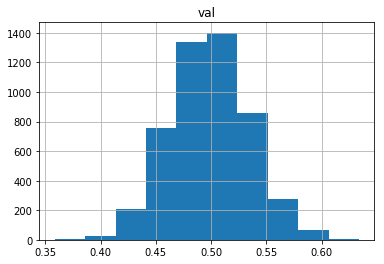

In [159]:
# distribution of heads/tails for non-zero values
df = pd.DataFrame(pp*lp, columns=['val'])
df[df['val'] > 0].hist()

**Question 2-g:** How does the posterior distribution compare to the prior distribution? To the likelihood? What would your posterior have looked like if you had flipped 5 heads out of 10?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2ea0b3898>]], dtype=object)

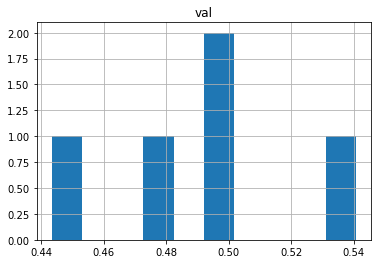

In [174]:
# flip a coin 10,000 times
pp = beta.rvs(a, b, size=10)
# manually setting 5 coin flips of heads
lp = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
# distribution of heads/tails for non-zero values
df = pd.DataFrame(pp*lp, columns=['val'])
df[df['val'] > 0].hist()

**Question 3-a:** Suppose you pick up another coin on the street. Given our experiences with the last coin, we're much less certain about the probability of flipping heads $p$. Our _a priori_ beliefs about $p$ have been updated.

Instead of a $Beta(\alpha = 100, \beta = 100)$ prior, we now have a $Beta(\alpha = 5, \beta = 2)$ prior.

Plot this new prior and describe it in English.

**Bonus:** Plot the new prior and our simulated posterior on the same plot, and find $Beta$ parameters $\alpha$ and $\beta$ that best fit the simulated data. You may use these parameters as your new prior.

_How do we know the true posterior distribution is a Beta distribution?_

**Question 3-b:** You flip this new coin 15 times, and observe 7 heads! Describe how your likelihood function is different this time.

**Question 3-c:** Repeat question 2-f, but with the your new prior. Describe how the new data has affected the posterior distribution of $p$.

**Question 4-a:** As you're walking down the street, you hit your head on a signpost. You'll be fine, but for the time being you forget everything you know. Still, you continue flipping your coin.

Your prior beliefs about $p$ are now represented by $Beta(\alpha = 1, \beta = 1)$. Why does this parameterization of the $Beta$ distribution reflect your current state?

**Question 4-b:** You flip your coin twice and observe 2 tails. Plot the posterior distribution. What effect does this observed data have on the posterior distribution of $p$? How do you think it differs from the likely effect of the same data given our original prior, $Beta(\alpha = 100, \beta = 100)$?